In [3]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import shutil
import os

def open_image():
    file_path = filedialog.askopenfilename(filetypes=[("이미지 파일", "*.png;*.jpg;*.jpeg;*.gif")])
    if file_path:
        image = Image.open(file_path)
        image.thumbnail((300, 300))  # 이미지 크기 조절 (조정 가능)
        photo = ImageTk.PhotoImage(image)
        image_label.config(image=photo)
        image_label.image = photo
        message_label.config(text="이미지가 성공적으로 업로드되었습니다!")
        
        # 업로드한 이미지를 저장할 파일명 설정
        new_image_name = 'image1.jpg'
        
        # 데스크탑 경로 가져오기
        save_folder = r"C:/upload"
        os.makedirs(save_folder, exist_ok=True)
        
        # 파일을 저장
        destination_path = os.path.join(save_folder, new_image_name)
        shutil.copy(file_path, destination_path)
    else:
        message_label.config(text="이미지를 업로드하세요.")

# Tkinter 창 생성
root = tk.Tk()
root.title("이미지 업로드 및 저장")

# 이미지 업로드 버튼 생성
upload_button = tk.Button(root, text="이미지 업로드", command=open_image)
upload_button.pack(pady=10)

# 이미지를 표시할 라벨 생성
image_label = tk.Label(root)
image_label.pack(pady=10)

# 메시지를 표시할 라벨 생성
message_label = tk.Label(root, text="이미지를 업로드하세요.")
message_label.pack(pady=5)

root.mainloop()


In [9]:
import os
from PIL import Image

def get_image_from_folder_on_desktop(folder_path, image_name):
    
    # 폴더가 존재하지 않으면 None 반환
    if not os.path.exists(folder_path):
        print(f"{folder_path} 경로가 데스크탑에 존재하지 않습니다.")
        return None
    
    # 이미지 파일 경로 생성
    image_path = os.path.join(folder_path, image_name)
    
    # 이미지 파일이 존재하지 않으면 None 반환
    if not os.path.exists(image_path):
        print(f"{image_name} 이미지 파일이 {folder_path} 경로에 존재하지 않습니다.")
        return None
    
    # 이미지 열기
    image = Image.open(image_path)
    return image

# 특정 폴더와 이미지 이름 지정
image_name = 'image1.jpg'
folder_path = r"C:/upload"
# 이미지 가져오기
image_variable = get_image_from_folder_on_desktop(folder_path, image_name)

# 이미지가 정상적으로 로드되면 사용 가능
if image_variable:
    # 이미지 처리 등 추가 작업 수행
    print("이미지를 성공적으로 가져왔습니다.")
    image_variable.show()  # 이미지를 보여줄 수 있습니다.
else:
    print("이미지를 가져오지 못했습니다.")


이미지를 성공적으로 가져왔습니다.


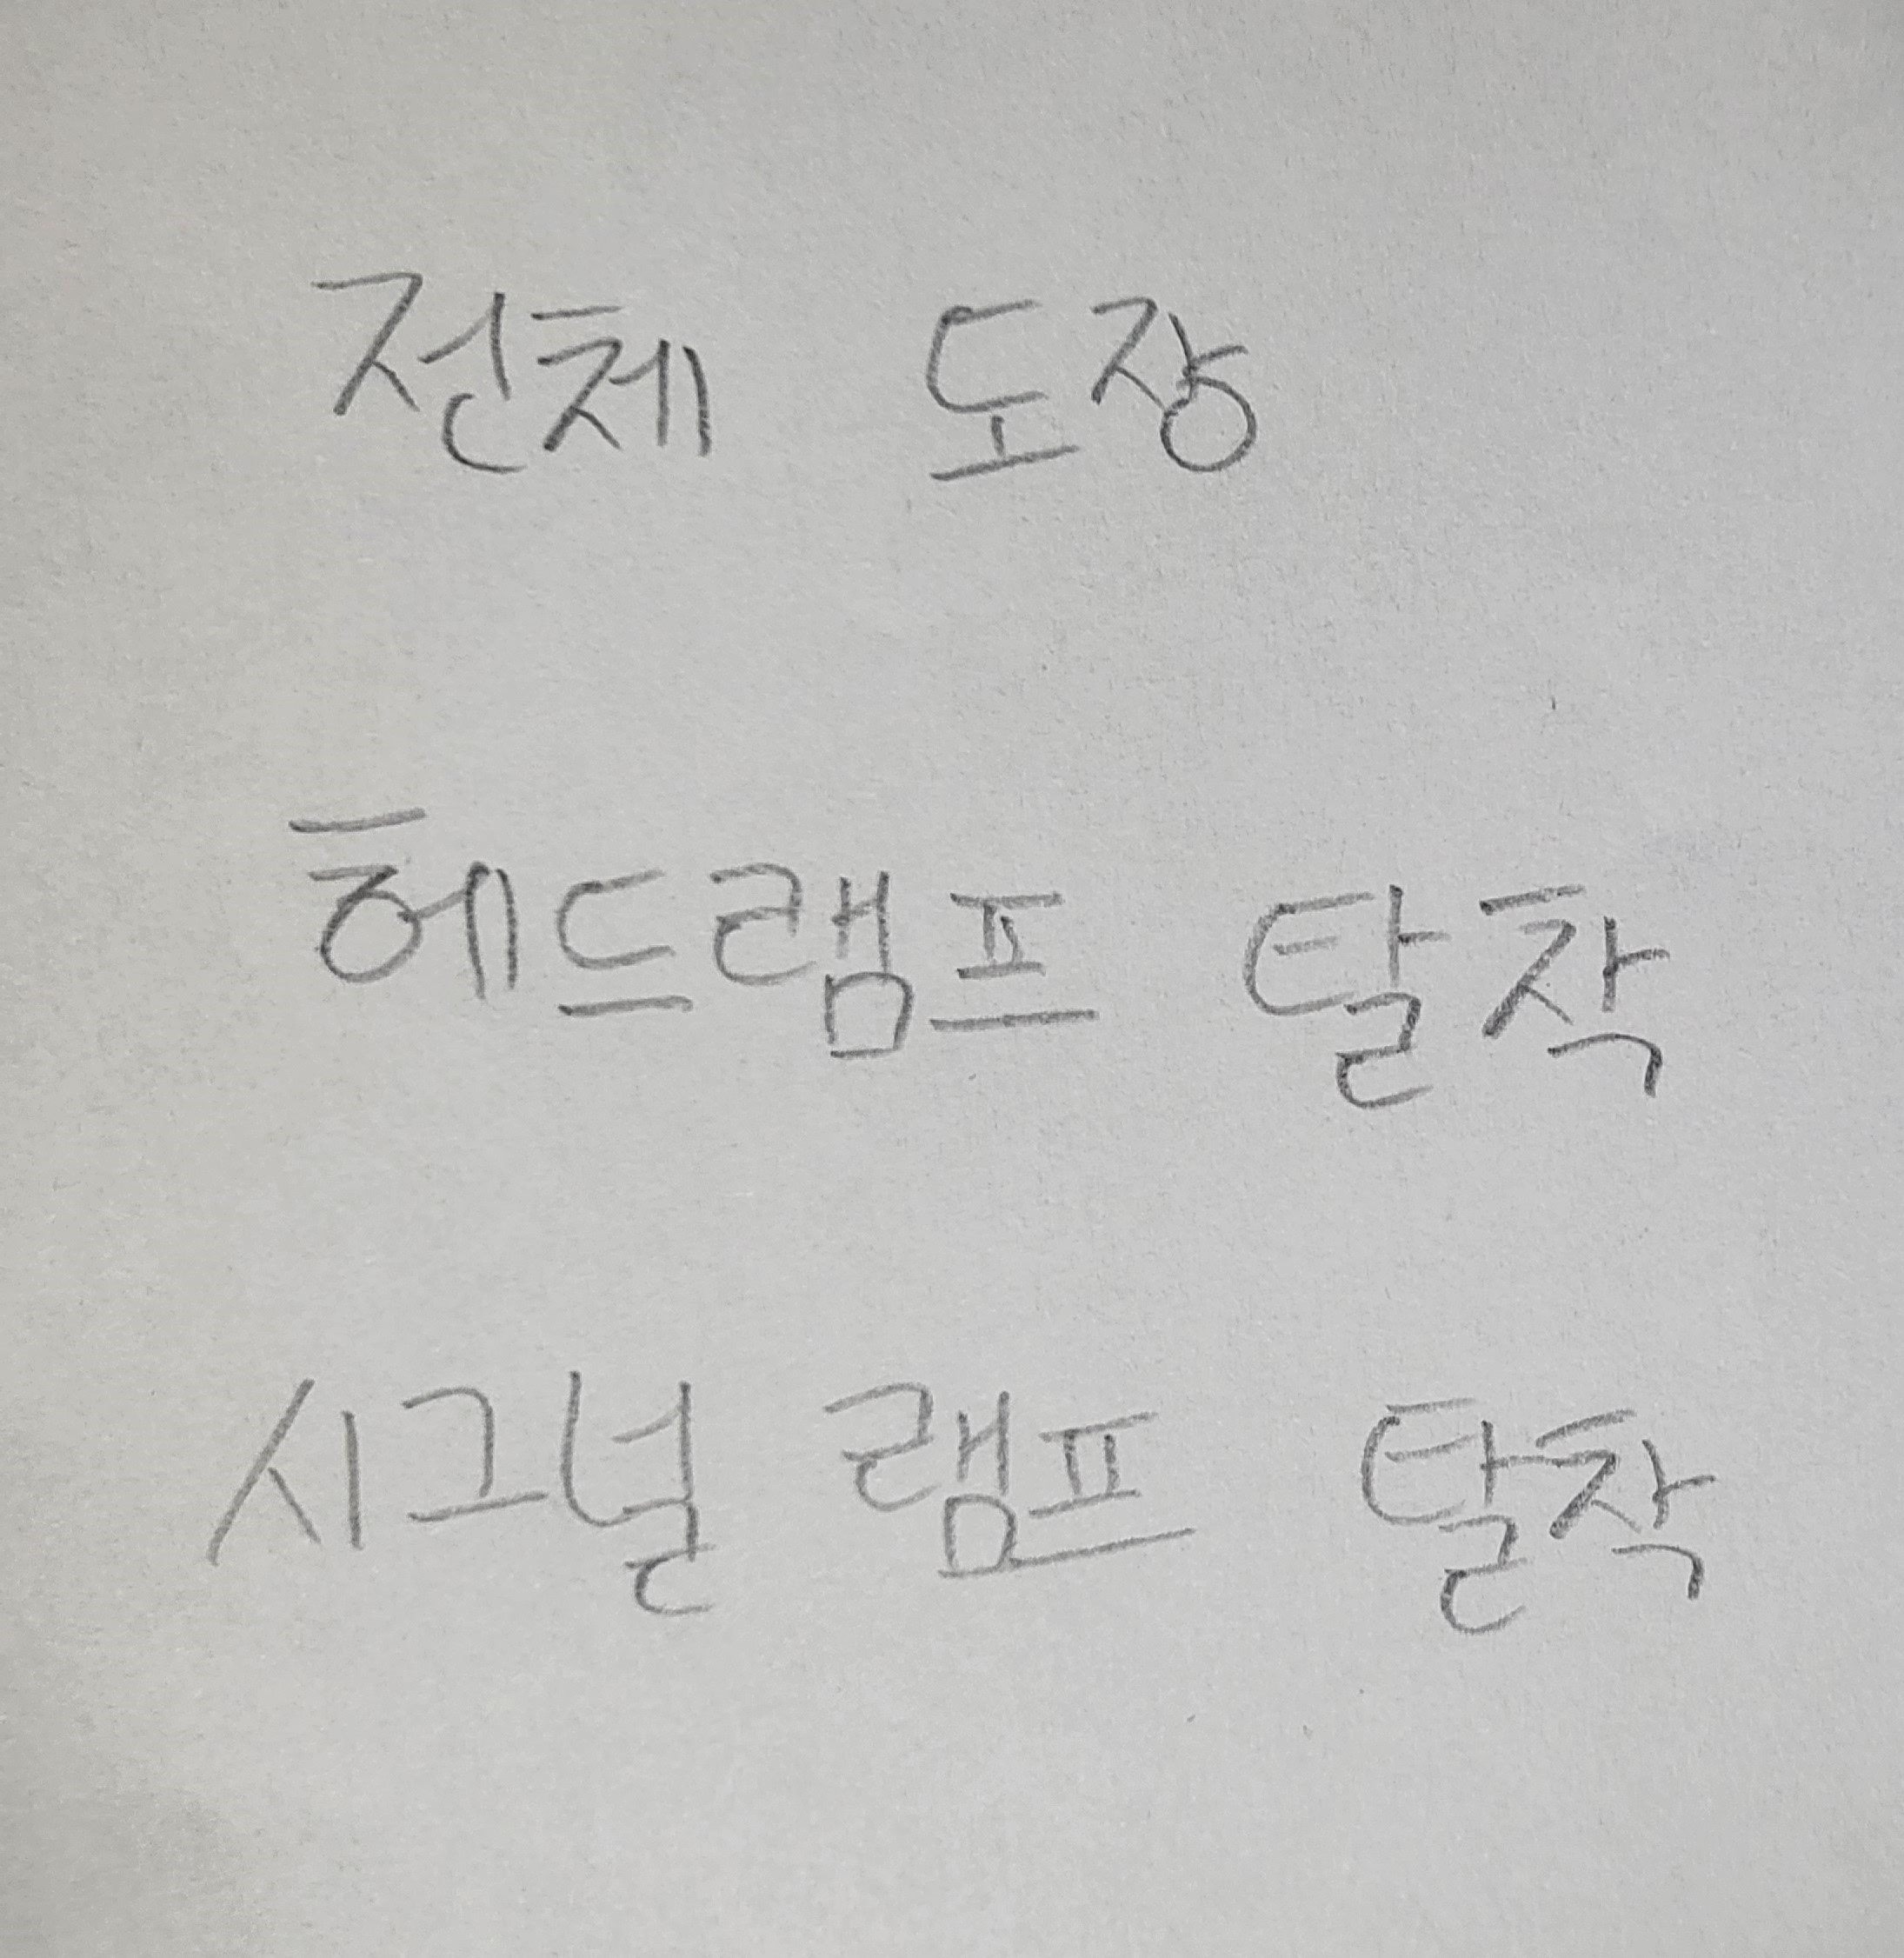

In [10]:
image_variable

## 미리 만든 모델을 활용해 OCR하기

In [5]:
pip install opencv-python pytesseract


  Using cached opencv_python-4.8.0.74-cp37-abi3-win_amd64.whl (38.1 MB)
  Using cached pytesseract-0.3.10-py3-none-any.whl (14 kB)


## 모델 학습

## 학습한 모델을 이용해서 OCR

In [1]:
import os
import cv2
import pytesseract

def ocr_korean_text_with_form(image_path, form_template_path):
    # Read form template image
    form_template = cv2.imread(form_template_path, 0)

    # Read image file into OpenCV
    image = cv2.imread(image_path)

    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding for binarization
    _, binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 11, 2)

    # Apply image median blur to remove noise
    blurred_image = cv2.medianBlur(binary_image, 3)

    # Text region detection (You may need to implement this step based on your specific form)
    # 예시로서, 이미지 전체 영역으로 텍스트 영역을 설정합니다.
    text_region = blurred_image.copy()

    # Extract text from text region
    custom_config = r'--oem 3 --psm 6 -c preserve_interword_spaces=1 -c preserve_interword_spaces=1'
    extracted_text = pytesseract.image_to_string(text_region, lang='kor', config=custom_config)

    return extracted_text

# specify a specific folder path
folder_path = r"C:/upload"

# image1 Specifies image file path
image1_filename = 'image1.jpg'
image1_path = os.path.join(folder_path, image1_filename)

# Form template image path
form_template_path = r"C:/form_template.jpg"

# Perform OCR on the image with the specific form
extracted_text = ocr_korean_text_with_form(image1_path, form_template_path)

# output extracted text
print(f"Text extracted from {image1_filename} with the form:")
print(extracted_text)


KeyboardInterrupt: 

In [6]:
print(extracted_text)

선처 뇨주
ㅎ     일 ;       「ㅡ에 ~ ~
[12411 랜노 } 잔
시그님 램프. 담화



## 견적 데이터 가져오기

In [10]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd

# 파일 경로 설정 (Iupload 폴더에 있는 data.xlsx 파일 경로)
data_route = r"C:/upload/data.xlsx"

# 데이터를 데이터 프레임으로 가져오기
df = pd.read_excel(data_route)

# 데이터 프레임 출력
df


,차종,견적내용,부품비,공임비,총합계비용
0,화물,적재함 탈착,0,376000,376000
1,화물,트랜스밋션 탈착,0,100000,100000
2,화물,판스프링(앞좌) 교환,0,95000,95000
3,화물,캐빈 리어마운팅 멤버 교환,0,62000,62000
4,화물,가드레일 교환,0,57000,57000
...,...,...,...,...,...
69,RV,트렁크바닥및실내바닥(리어) 판금,0,150000,150000
70,RV,리어 플로어센터리어멤버 판금,0,75000,750000
71,RV,타이어(스페어) 교환,0,27500,27500
72,RV,배기파이프 3번 교환,0,20000,20000


## OCR 결과값 가정

In [12]:
car_kind = "승용"
repair_list = ['컬러매칭 도장', '후드 교환', '콘솔박스 교환']

## OCR 결과값과 엑셀 견적내용 비교

In [13]:
selected_car = df[df['차종'] == car_kind]
filtered_dataframe = selected_car[selected_car['견적내용'].isin(repair_list)]
filtered_dataframe

,차종,견적내용,부품비,공임비,총합계비용
51,승용,컬러매칭 도장,33000,95000,128000
57,승용,후드 교환,0,35000,35000
60,승용,콘솔박스 교환,0,31000,31000


## 워드파일 채우기

In [14]:
pip install python-docx


  Using cached python-docx-0.8.11.tar.gz (5.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184519 sha256=8abc7e1ae645ea4dbdefcc072e229a94da3c7e02fd17c35f32a197dfb9023ce1
  Stored in directory: c:\users\laptop_ljh\appdata\local\pip\cache\wheels\b2\11\b8\209e41af524253c9ba6c2a8b8ecec0f98ecbc28c732512803c
Successfully built python-docx


In [20]:
## 차종 입력 (문자열 입력)
import os
from docx import Document

def fill_table_in_word(file_path, table_index, row_index, col_index, word):
    document = Document(file_path)
    
    # 특정 인덱스의 테이블 선택
    table = document.tables[table_index]
    
    # 특정 위치에 문자열 채우기
    table.cell(row_index, col_index).text = word

    # 변경된 내용 저장
    document.save(file_path)

# 워드 파일 경로
folder_path = r"C:/upload"
wordfile_name = "fill.docx"
file_path = os.path.join(folder_path, wordfile_name)

# 테이블 인덱스와 문자열 변수 word의 값을 채울 위치 설정
table_index = 0  # 첫 번째 테이블
row_index = 0    # 첫 번째 행
col_index = 4    # 다섯 번째 열
word = car_kind

# 기존의 워드 파일에서 특정 테이블에 데이터를 채우고 저장
fill_table_in_word(file_path, table_index, row_index, col_index, word)


In [21]:
## 견적내용 입력 (데이터프레임)
from docx import Document
import pandas as pd

def fill_table_from_dataframe(file_path, table_index, start_row, start_col, dataframe):
    document = Document(file_path)
    
    # 특정 인덱스의 테이블 선택
    table = document.tables[table_index]

    # 데이터프레임의 데이터를 테이블에 채우기
    for row_index, row_data in enumerate(dataframe.values):
        for col_index, cell_value in enumerate(row_data):
            table.cell(row_index + start_row, col_index + start_col).text = str(cell_value)

    # 변경된 내용 저장
    document.save(file_path)

# 테이블 인덱스 설정 (0부터 시작)
table_index = 1
row_index = 2
col_index = 0

# 데이터프레임 예시
dataframe = filtered_dataframe.iloc[:, 1:2]

# 데이터프레임의 데이터를 두 번째 테이블의 두 번째 행과 첫 번째 열부터 채우고 저장
fill_table_from_dataframe(file_path, table_index, start_row=row_index, start_col=col_index, dataframe=dataframe)


In [22]:
## 부품비 입력

# 테이블 인덱스 설정 (0부터 시작)
table_index = 1
row_index = 2
col_index = 8

# 데이터프레임 예시
dataframe = filtered_dataframe.iloc[:, 2:3]

# 데이터프레임의 데이터를 두 번째 테이블의 두 번째 행과 첫 번째 열부터 채우고 저장
fill_table_from_dataframe(file_path, table_index, start_row=row_index, start_col=col_index, dataframe=dataframe)


In [23]:
## 공임비, 합계 입력

# 테이블 인덱스 설정 (0부터 시작)
table_index = 1
row_index = 2
col_index = 11

# 데이터프레임 예시
dataframe = filtered_dataframe.iloc[:, 3:5]

# 데이터프레임의 데이터를 두 번째 테이블의 두 번째 행과 첫 번째 열부터 채우고 저장
fill_table_from_dataframe(file_path, table_index, start_row=row_index, start_col=col_index, dataframe=dataframe)


In [24]:
## 합계 데이터프레임

sum_row = filtered_dataframe.select_dtypes(include='int').sum().to_frame().T
sum_row['부가가치세'] = int(sum_row['총합계비용'] * 0.1)
sum_row['부가가치세포함총액'] = sum_row['총합계비용'] + sum_row['부가가치세']
sum_row

,부품비,공임비,총합계비용,부가가치세,부가가치세포함총액
0,33000,161000,194000,19400,213400


In [25]:
## 맨 밑 총정리 부품비 입력


# 테이블 인덱스 설정 (0부터 시작)
table_index = 1
row_index = 22
col_index = 1

# 데이터프레임 예시
dataframe = sum_row.iloc[:,0:1]

# 데이터프레임의 데이터를 두 번째 테이블의 두 번째 행과 첫 번째 열부터 채우고 저장
fill_table_from_dataframe(file_path, table_index, start_row=row_index, start_col=col_index, dataframe=dataframe)


In [26]:
## 맨 밑 총정리 공임비 입력


# 테이블 인덱스 설정 (0부터 시작)
table_index = 1
row_index = 22
col_index = 3

# 데이터프레임 예시
dataframe = dataframe = sum_row.iloc[:,1:2]

# 데이터프레임의 데이터를 두 번째 테이블의 두 번째 행과 첫 번째 열부터 채우고 저장
fill_table_from_dataframe(file_path, table_index, start_row=row_index, start_col=col_index, dataframe=dataframe)


In [27]:
## 맨 밑 총정리 계 입력


# 테이블 인덱스 설정 (0부터 시작)
table_index = 1
row_index = 22
col_index = 5

# 데이터프레임 예시
dataframe = dataframe = sum_row.iloc[:,2:3]

# 데이터프레임의 데이터를 두 번째 테이블의 두 번째 행과 첫 번째 열부터 채우고 저장
fill_table_from_dataframe(file_path, table_index, start_row=row_index, start_col=col_index, dataframe=dataframe)


In [28]:
## 맨 밑 총정리 부가가치세 입력

# 테이블 인덱스 설정 (0부터 시작)
table_index = 1
row_index = 22
col_index = 8

# 데이터프레임 예시
dataframe = dataframe = sum_row.iloc[:,3:4]

# 데이터프레임의 데이터를 두 번째 테이블의 두 번째 행과 첫 번째 열부터 채우고 저장
fill_table_from_dataframe(file_path, table_index, start_row=row_index, start_col=col_index, dataframe=dataframe)


In [29]:
## 맨 밑 총정리 총액 입력

# 테이블 인덱스 설정 (0부터 시작)
table_index = 1
row_index = 22
col_index = 10

# 데이터프레임 예시
dataframe = dataframe = sum_row.iloc[:,4:5]

# 데이터프레임의 데이터를 두 번째 테이블의 두 번째 행과 첫 번째 열부터 채우고 저장
fill_table_from_dataframe(file_path, table_index, start_row=row_index, start_col=col_index, dataframe=dataframe)
